In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn import svm
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


In [ ]:
dataset = pd.read_csv('/placementdata.txt.csv')

In [ ]:
dataset.head()

,RegNo.,Quants,LogicalReasoning,Verbal,Programming,CGPA,Networking,CloudComp,WebServices,DataAnalytics,QualityAssurance,AI,Placed
0,T150054001,11,11,10,11,10.00,4.3,6.2,7.4,8.3,8.1,8.0,1
1,T150054002,8,10,11,18,8.80,8.9,8.0,8.0,8.0,8.3,9.4,1
2,T150054003,11,11,10,8,9.63,8.4,8.0,8.0,8.0,8.0,5.4,1
3,T150054004,14,13,8,8,6.55,4.5,6.5,6.9,3.3,4.1,4.6,0
4,T150054005,10,7,7,10,7.27,3.1,5.6,6.7,4.6,2.7,4.4,0


In [ ]:
# missing values checking
dataset.isnull().sum()

RegNo.              0
Quants              0
LogicalReasoning    0
Verbal              0
Programming         0
CGPA                0
Networking          0
CloudComp           0
WebServices         0
DataAnalytics       0
QualityAssurance    0
AI                  0
Placed              0
dtype: int64

In [ ]:
# checking column values data type
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 330 entries, 0 to 329
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   RegNo.            330 non-null    object 
 1   Quants            330 non-null    int64  
 2   LogicalReasoning  330 non-null    int64  
 3   Verbal            330 non-null    int64  
 4   Programming       330 non-null    int64  
 5   CGPA              330 non-null    float64
 6   Networking        330 non-null    float64
 7   CloudComp         330 non-null    float64
 8   WebServices       330 non-null    float64
 9   DataAnalytics     330 non-null    float64
 10  QualityAssurance  330 non-null    float64
 11  AI                330 non-null    float64
 12  Placed            330 non-null    int64  
dtypes: float64(7), int64(5), object(1)
memory usage: 33.6+ KB


LABEL ENCODING DATA

In [ ]:

encoder = LabelEncoder() # to encode string to the values like 0,1,2 etc

In [ ]:
columns_to_encode = ['RegNo.']
for column in columns_to_encode:
    dataset[column] = encoder.fit_transform(dataset[column])

In [ ]:
dataset

,RegNo.,Quants,LogicalReasoning,Verbal,Programming,CGPA,Networking,CloudComp,WebServices,DataAnalytics,QualityAssurance,AI,Placed
0,0,11,11,10,11,10.00,4.3,6.2,7.4,8.3,8.1,8.0,1
1,1,8,10,11,18,8.80,8.9,8.0,8.0,8.0,8.3,9.4,1
2,2,11,11,10,8,9.63,8.4,8.0,8.0,8.0,8.0,5.4,1
3,3,14,13,8,8,6.55,4.5,6.5,6.9,3.3,4.1,4.6,0
4,4,10,7,7,10,7.27,3.1,5.6,6.7,4.6,2.7,4.4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
325,325,22,25,24,23,9.35,8.4,9.4,8.8,8.9,9.1,8.4,0
326,326,25,23,21,22,8.51,8.7,8.8,9.4,8.0,7.6,8.0,0
327,327,21,23,24,25,8.82,7.8,9.3,9.0,8.6,8.1,8.7,0
328,328,22,25,24,21,8.59,7.9,9.4,9.1,9.0,8.3,8.8,1


In [ ]:
dataset.describe()

,RegNo.,Quants,LogicalReasoning,Verbal,Programming,CGPA,Networking,CloudComp,WebServices,DataAnalytics,QualityAssurance,AI,Placed
count,330.000000,330.000000,330.000000,330.000000,330.000000,330.000000,330.000000,330.000000,330.000000,330.000000,330.000000,330.000000,330.000000
mean,164.500000,15.830303,15.990909,15.872727,15.957576,8.007758,6.303636,7.749697,7.829091,6.512727,6.417273,6.705455,0.396970
std,95.407023,4.266394,4.432188,4.353196,4.151905,0.647346,1.618243,0.913767,0.864534,1.518805,1.733412,1.336864,0.490013
min,0.000000,7.000000,7.000000,7.000000,7.000000,6.520000,2.500000,5.500000,5.500000,2.500000,1.800000,4.300000,0.000000
25%,82.250000,14.000000,14.000000,14.000000,14.000000,7.590000,5.600000,7.500000,7.500000,5.700000,5.700000,5.700000,0.000000
50%,164.500000,16.000000,16.000000,16.000000,16.000000,8.040000,6.500000,8.000000,8.000000,6.700000,6.650000,6.600000,0.000000
75%,246.750000,19.000000,19.000000,19.000000,19.000000,8.400000,7.300000,8.300000,8.300000,7.500000,7.475000,7.700000,1.000000
max,329.000000,25.000000,25.000000,25.000000,25.000000,10.000000,9.700000,9.500000,9.500000,9.400000,9.500000,9.800000,1.000000


Checking for Correlation

In [ ]:
dataset.corr()

,RegNo.,Quants,LogicalReasoning,Verbal,Programming,CGPA,Networking,CloudComp,WebServices,DataAnalytics,QualityAssurance,AI,Placed
RegNo.,1.000000,0.733019,0.745495,0.770883,0.767918,0.440158,0.624309,0.712335,0.625649,0.452548,0.434008,0.397577,0.025324
Quants,0.733019,1.000000,0.747361,0.805990,0.752021,0.478180,0.626786,0.713146,0.639416,0.538174,0.526724,0.460120,0.048314
LogicalReasoning,0.745495,0.747361,1.000000,0.755006,0.745899,0.520421,0.678945,0.734626,0.653143,0.535122,0.521059,0.489287,0.029657
Verbal,0.770883,0.805990,0.755006,1.000000,0.767733,0.508145,0.665136,0.752647,0.665265,0.521569,0.524341,0.487204,0.032307
Programming,0.767918,0.752021,0.745899,0.767733,1.000000,0.517991,0.633505,0.718641,0.649493,0.496989,0.523584,0.462497,0.017267
CGPA,0.440158,0.478180,0.520421,0.508145,0.517991,1.000000,0.598668,0.545847,0.643547,0.724325,0.765964,0.664781,0.301680
Networking,0.624309,0.626786,0.678945,0.665136,0.633505,0.598668,1.000000,0.808998,0.689744,0.647236,0.629090,0.587249,0.244261
CloudComp,0.712335,0.713146,0.734626,0.752647,0.718641,0.545847,0.808998,1.000000,0.712620,0.605635,0.608881,0.577035,0.150630
WebServices,0.625649,0.639416,0.653143,0.665265,0.649493,0.643547,0.689744,0.712620,1.000000,0.718914,0.710138,0.681473,0.242433
DataAnalytics,0.452548,0.538174,0.535122,0.521569,0.496989,0.724325,0.647236,0.605635,0.718914,1.000000,0.811888,0.719877,0.362392


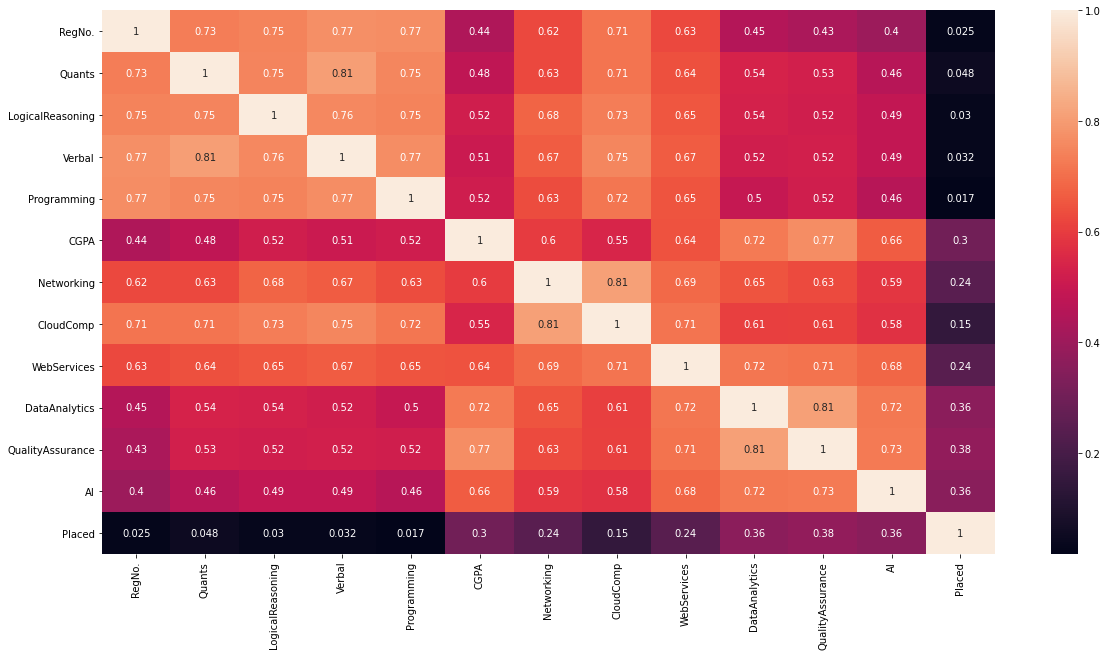

In [ ]:
plt.figure(figsize=(20,10))
sns.heatmap(dataset.corr().abs(), annot=True)#heatmap


Correlation between the features are atmost 0.9 so they are not multi-correlated

In [ ]:
dataset.shape

(330, 13)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

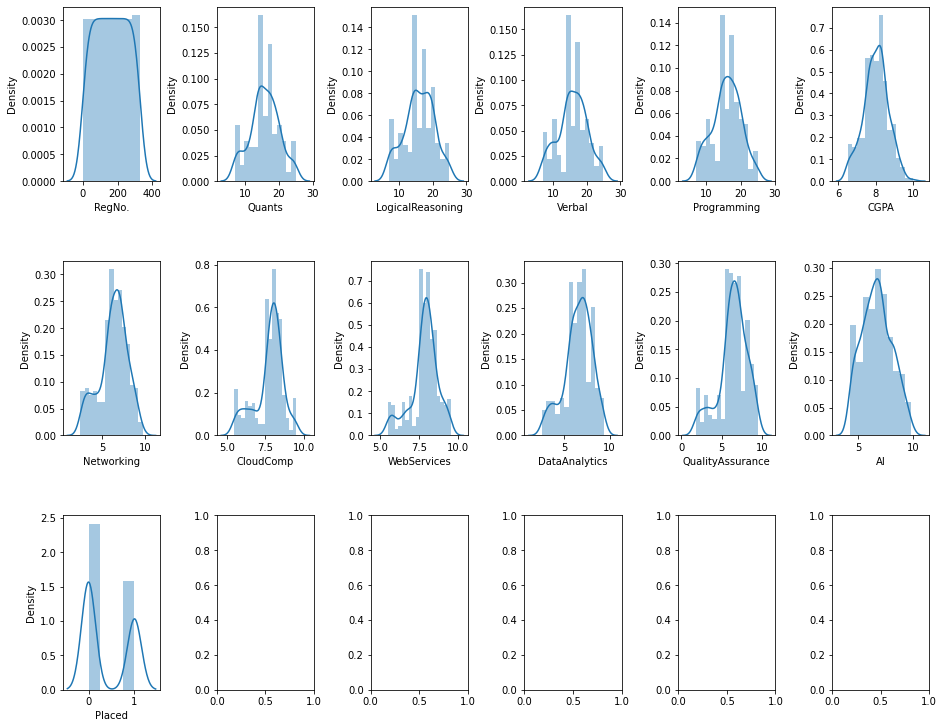

In [ ]:
# checking distributions of all features
fig, axs = plt.subplots(ncols=6,nrows=3,figsize=(13,10))
index = 0
axs = axs.flatten()
for k,v in dataset.items():
    sns.distplot(v, ax=axs[index])
    index+=1


plt.tight_layout(pad=0.3, w_pad=0.2,h_pad = 4.5)

In [ ]:
x = dataset.loc[:,dataset.columns!='Placed'] # all features are used
y = dataset.loc[:, 'Placed'] # label is status of placement

In [ ]:
x

,RegNo.,Quants,LogicalReasoning,Verbal,Programming,CGPA,Networking,CloudComp,WebServices,DataAnalytics,QualityAssurance,AI
0,0,11,11,10,11,10.00,4.3,6.2,7.4,8.3,8.1,8.0
1,1,8,10,11,18,8.80,8.9,8.0,8.0,8.0,8.3,9.4
2,2,11,11,10,8,9.63,8.4,8.0,8.0,8.0,8.0,5.4
3,3,14,13,8,8,6.55,4.5,6.5,6.9,3.3,4.1,4.6
4,4,10,7,7,10,7.27,3.1,5.6,6.7,4.6,2.7,4.4
...,...,...,...,...,...,...,...,...,...,...,...,...
325,325,22,25,24,23,9.35,8.4,9.4,8.8,8.9,9.1,8.4
326,326,25,23,21,22,8.51,8.7,8.8,9.4,8.0,7.6,8.0
327,327,21,23,24,25,8.82,7.8,9.3,9.0,8.6,8.1,8.7
328,328,22,25,24,21,8.59,7.9,9.4,9.1,9.0,8.3,8.8


In [ ]:
y

0      1
1      1
2      1
3      0
4      0
      ..
325    0
326    0
327    0
328    1
329    1
Name: Placed, Length: 330, dtype: int64

In [ ]:
sc= StandardScaler()
x_scaled = sc.fit_transform(x) # for standardising the features
x_scaled = pd.DataFrame(x_scaled)

In [ ]:
x_train,x_test, y_train, y_test = train_test_split(x_scaled,y,test_size=0.18, random_state=0)

Using Logistic Regression

In [ ]:
lr = LogisticRegression()

In [ ]:
lr.fit(x_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
y_pred = lr.predict(x_test)

In [ ]:
y_pred

array([0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1])

In [ ]:
y_test

122    0
66     0
142    1
246    0
146    1
63     1
269    1
15     0
136    0
144    0
268    0
59     0
26     0
68     0
213    1
250    1
157    0
108    0
60     1
212    0
210    0
233    1
170    0
296    0
221    0
300    1
308    0
220    1
278    0
171    1
189    0
239    0
218    0
7      0
6      1
56     1
55     0
22     0
120    0
64     0
264    0
21     1
134    1
263    0
12     1
223    0
158    0
168    1
102    1
116    1
17     0
140    1
76     1
248    1
100    0
191    1
293    0
65     0
81     0
309    0
Name: Placed, dtype: int64

In [ ]:
accuracy_score(y_test, y_pred)

0.6666666666666666

In [ ]:
lr.score(x_train,y_train)

0.7296296296296296

In [ ]:
confusion_matrix(y_test, y_pred)

array([[28,  9],
       [11, 12]])

In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.72      0.76      0.74        37
           1       0.57      0.52      0.55        23

    accuracy                           0.67        60
   macro avg       0.64      0.64      0.64        60
weighted avg       0.66      0.67      0.66        60



Using Naive Bayes Classifier - Gaussian Naive Bayes¶

In [ ]:
nbclassifier = GaussianNB()

In [ ]:
nbclassifier.fit(x_train, y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [ ]:
y_pred_nb = nbclassifier.predict(x_test)

In [ ]:
accuracy_score(y_test, y_pred_nb)

0.5

In [ ]:
nbclassifier.score(x_train, y_train)

0.5888888888888889

In [ ]:
confusion_matrix(y_test, y_pred_nb)

array([[15, 22],
       [ 8, 15]])

In [ ]:
print(classification_report(y_test,y_pred_nb))

              precision    recall  f1-score   support

           0       0.65      0.41      0.50        37
           1       0.41      0.65      0.50        23

    accuracy                           0.50        60
   macro avg       0.53      0.53      0.50        60
weighted avg       0.56      0.50      0.50        60



Using SVM Linear Kernel

In [ ]:
clf = svm.SVC(kernel="linear")

In [ ]:
clf.fit(x_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [ ]:
y_pred_svm = clf.predict(x_test)

In [ ]:
accuracy_score(y_test, y_pred_svm)


0.7666666666666667

In [ ]:
clf.score(x_train, y_train)

0.7333333333333333

In [ ]:
confusion_matrix(y_test, y_pred_svm)

array([[34,  3],
       [11, 12]])

In [ ]:
print(classification_report(y_test, y_pred_svm))

              precision    recall  f1-score   support

           0       0.76      0.92      0.83        37
           1       0.80      0.52      0.63        23

    accuracy                           0.77        60
   macro avg       0.78      0.72      0.73        60
weighted avg       0.77      0.77      0.75        60



We conclude that Logistic Regression works better with better accuracy but difference in scores is highest among three.

Gaussian Naive Bayes was less accurate but the difference in known and unknown data was lesser.

So, Naive Bayes was better for not overfitting the data
Logistic Regression was better for accuracy
But, SVM gave better accuracy with least difference in score.
So, Our final model would use SVM for Student Placement Prediction.

